# 문제 1
- 내리막 길
- https://www.acmicpc.net/problem/1520

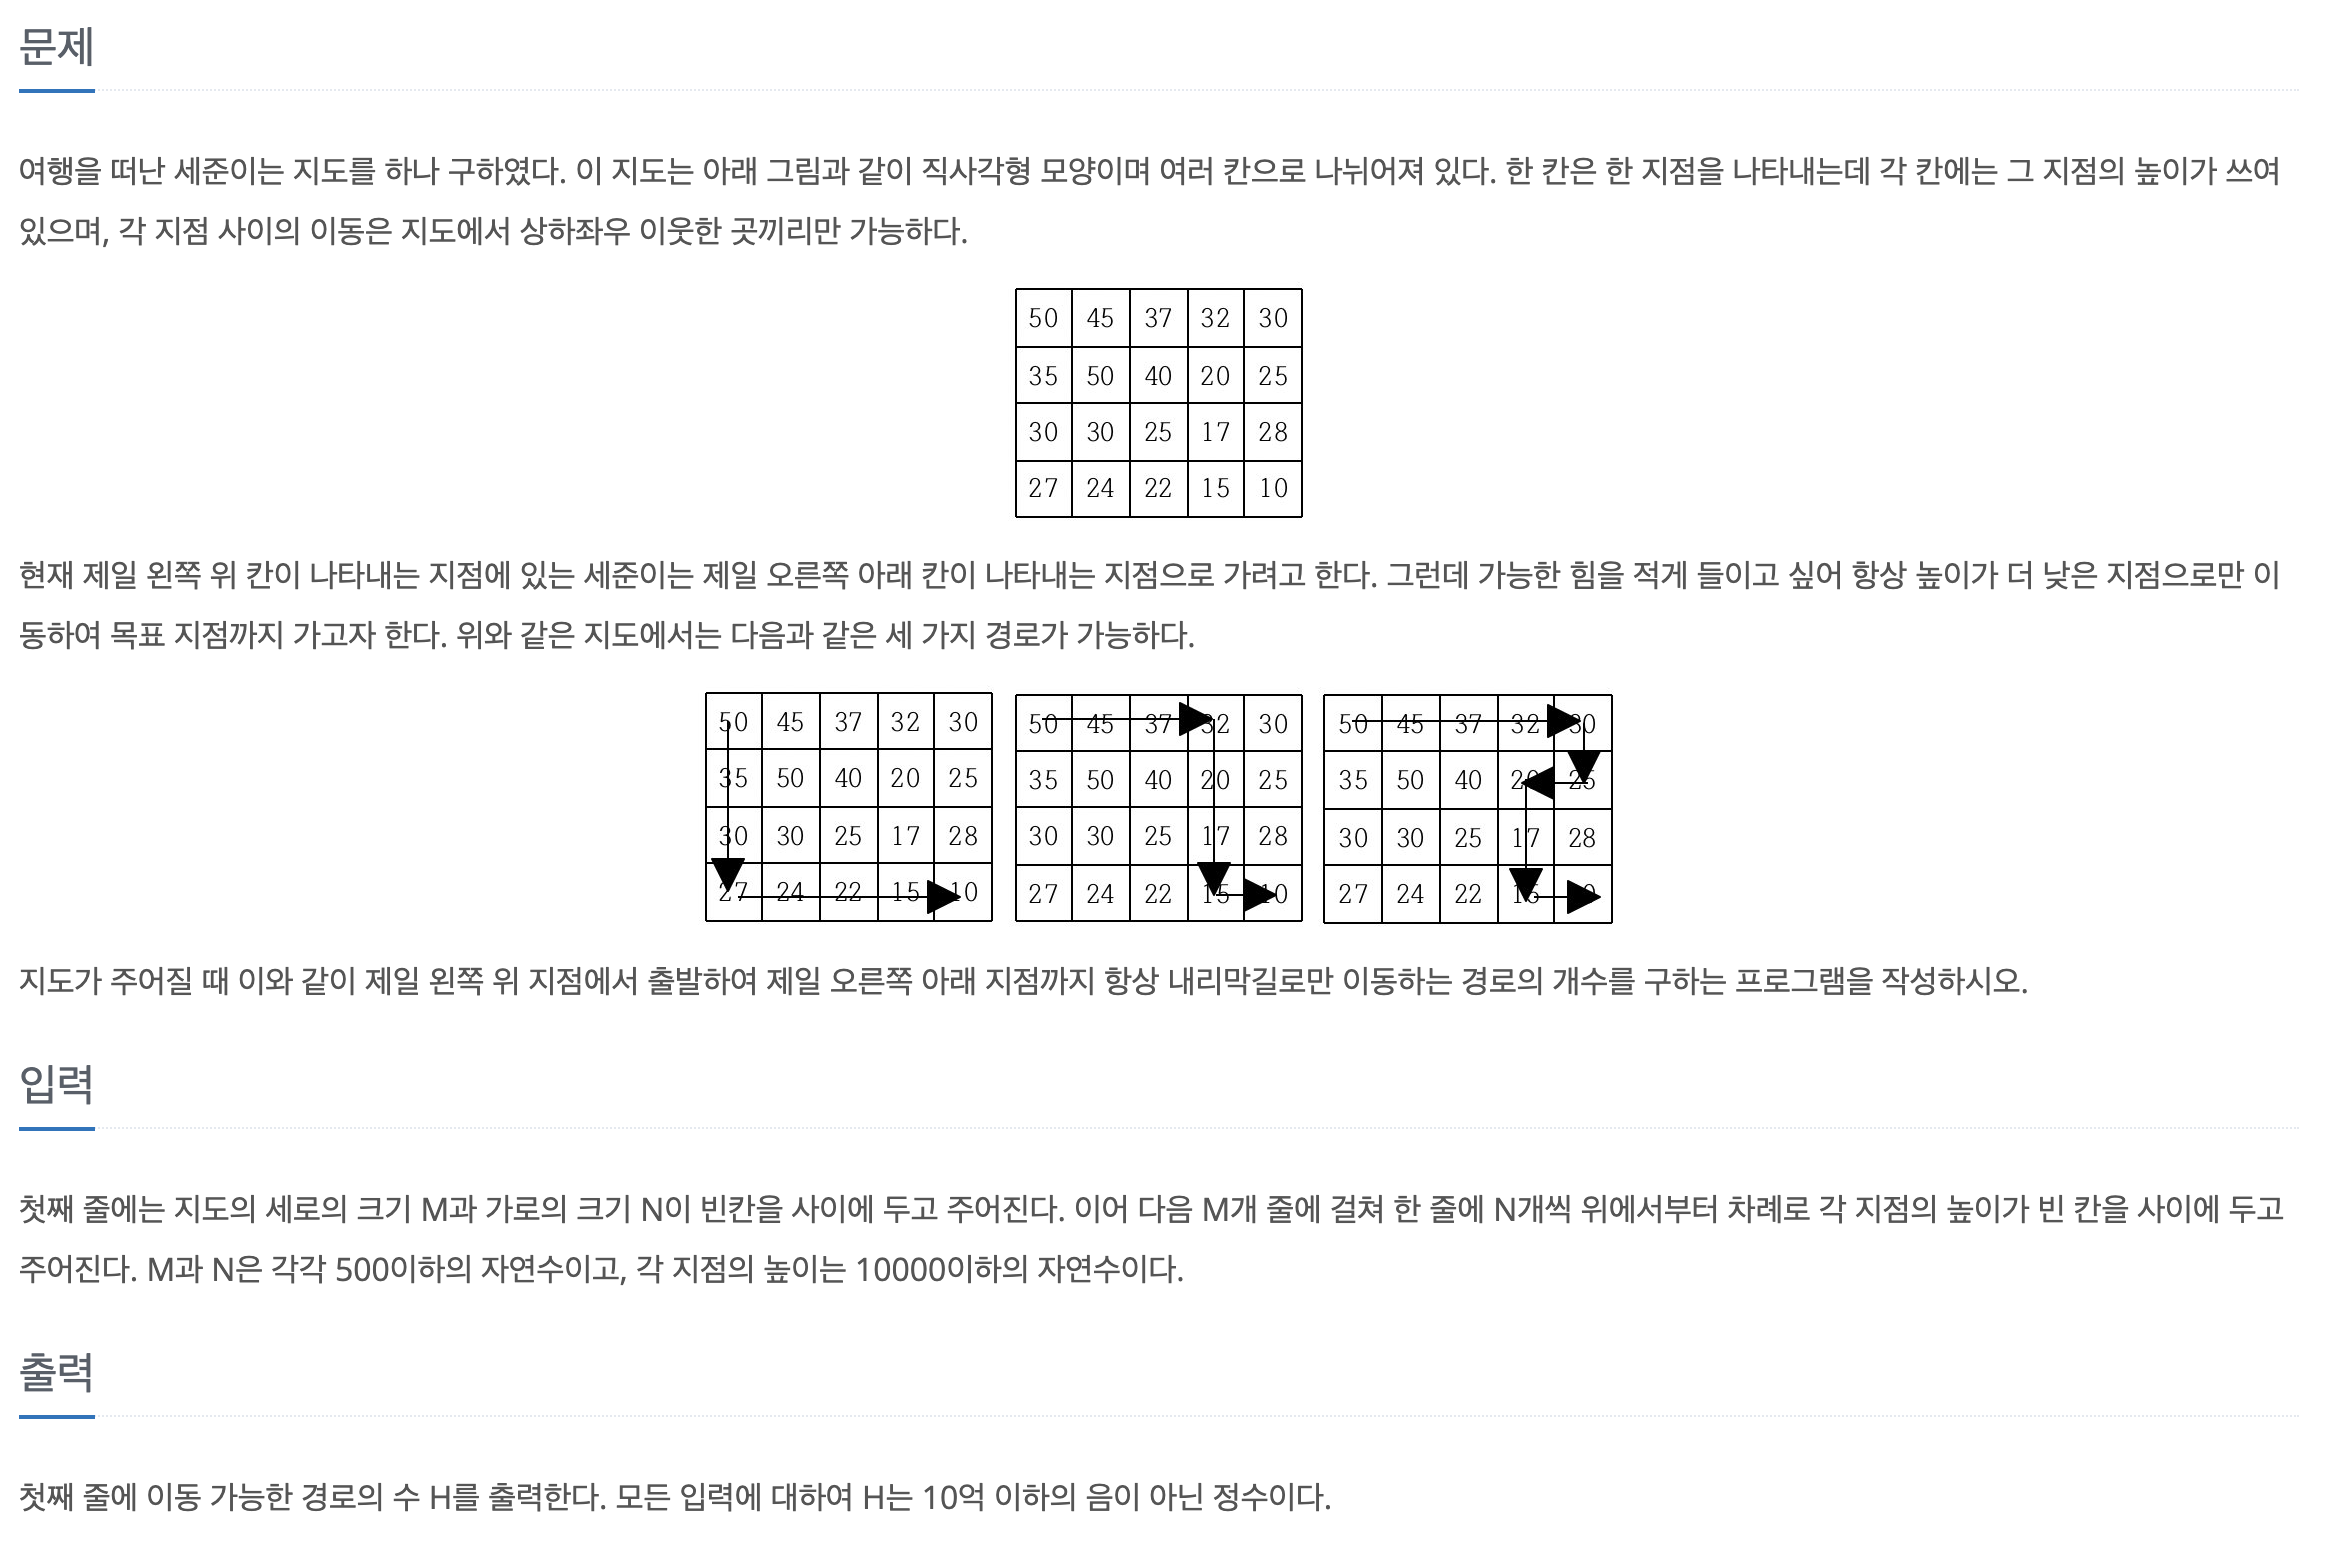
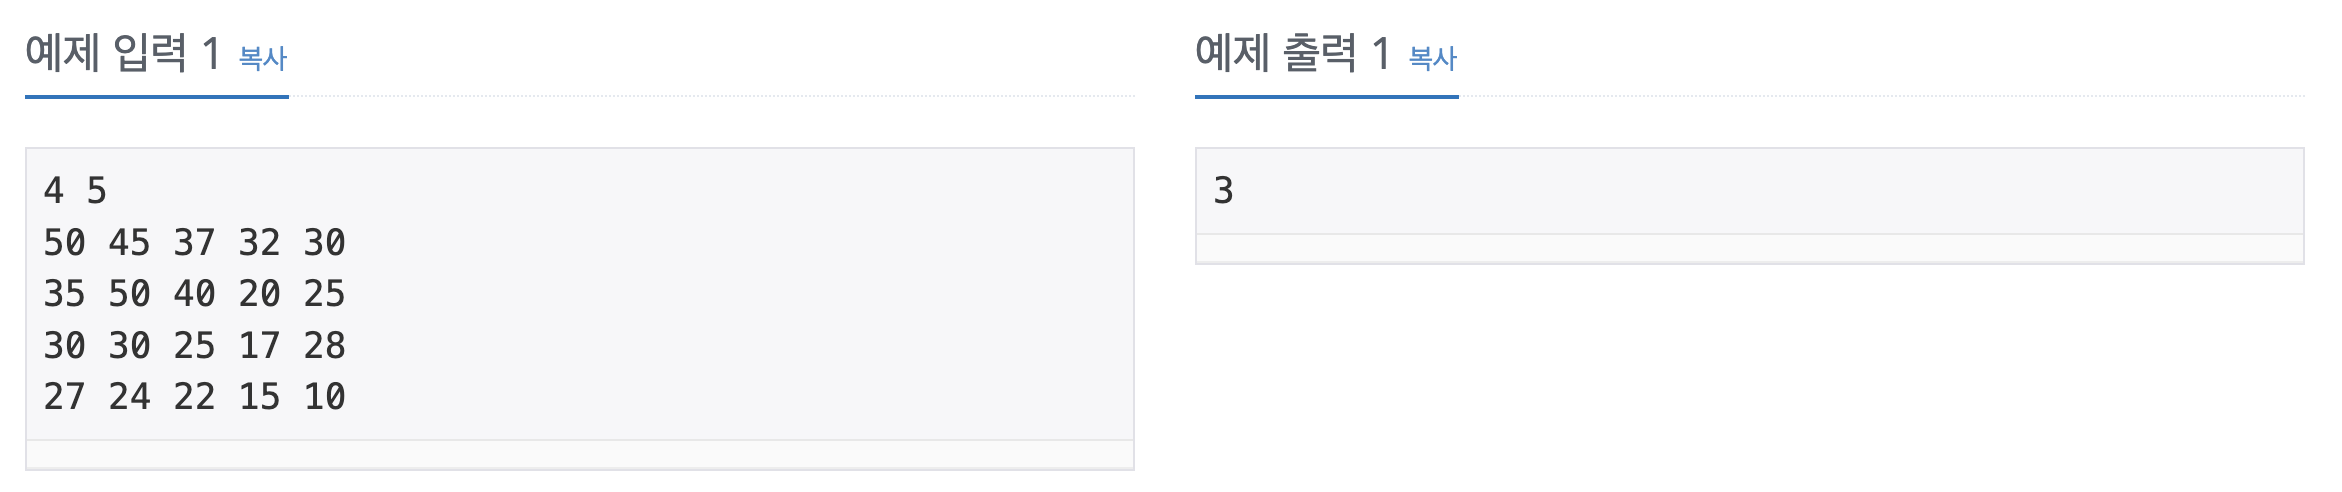

## Step
- dfs는 구현 성공, But 막혀버림
    - 이동했던 경로를 어떻게 처리해야하지?
    
    
- dp와 dfs를 융합해서 해결한 풀이 발견
- https://rccode.tistory.com/entry/Python-%EB%B0%B1%EC%A4%80-1520%EB%B2%88-%EB%82%B4%EB%A6%AC%EB%A7%89-%EA%B8%B8

```
DP[x][y]는 (x, y)에서 도달할 수 있는 경로이다. 즉, 우리는 DP[0][0]을 위해 코드를 작성한다.

DP는 모두 -1로 초기화하며, -1의 의미는 아직 방문하지 않은 것이다.

탐색 함수를 짤 때, 이것을 기준으로 방문한 적이 있을 경우에는 네 방향에 대한 탐색을 하는 것이 아니라, dp를 반환해준다.

아무튼, DFS의 구조가 꽤 간단하다. Base case는 x, y가 우측 하단인 경우이다.

그리고 Recursive case는, 내리막 길이라는 조건에 따라, 현재 좌표(x, y)에 대해 탐색을 해준다. 각 방향에 대한 경로의 경우의 수를 모아서 리턴해주는 식이다. 이렇게 하면 DP[0][0]이 우리가 원하는 값이 나온다.
```

In [2]:
m,n = map(int,input().split())
board = [[] for _ in range(m)]
for i in range(m):
    board[i] = list(map(int,input().split()))

board

4 5
50 45 37 32 30
35 50 40 20 25
30 30 25 17 28
27 24 22 15 10


[[50, 45, 37, 32, 30],
 [35, 50, 40, 20, 25],
 [30, 30, 25, 17, 28],
 [27, 24, 22, 15, 10]]

In [23]:
import sys
sys.setrecursionlimit(200000)
input = sys.stdin.readline

m,n = map(int,input().split())
board = [[] for _ in range(m)]
for i in range(m):
    board[i] = list(map(int,input().split()))

dx = [-1,0,1,0]
dy = [0,1,0,-1]

visit = [[-1]*n for _ in range(m)]

def dfs(x,y):
    if visit[x][y] != -1:
        return visit[x][y]
    
    if x == m-1 and y == n-1:
        return 1
        
    visit[x][y] = 0
    
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        
        if 0<=nx<m and 0<=ny<n:
            if board[nx][ny] < board[x][y]:
                visit[x][y] += dfs(nx,ny)
                
    return visit[x][y]

print(dfs(0,0))

In [28]:
for i in range(m):
    print(visit[i])

[3, 2, 2, 2, 1]
[1, -1, -1, 1, 1]
[1, -1, -1, 1, -1]
[1, 1, 1, 1, -1]


# 문제 2
- 적록색약
- https://www.acmicpc.net/problem/10026

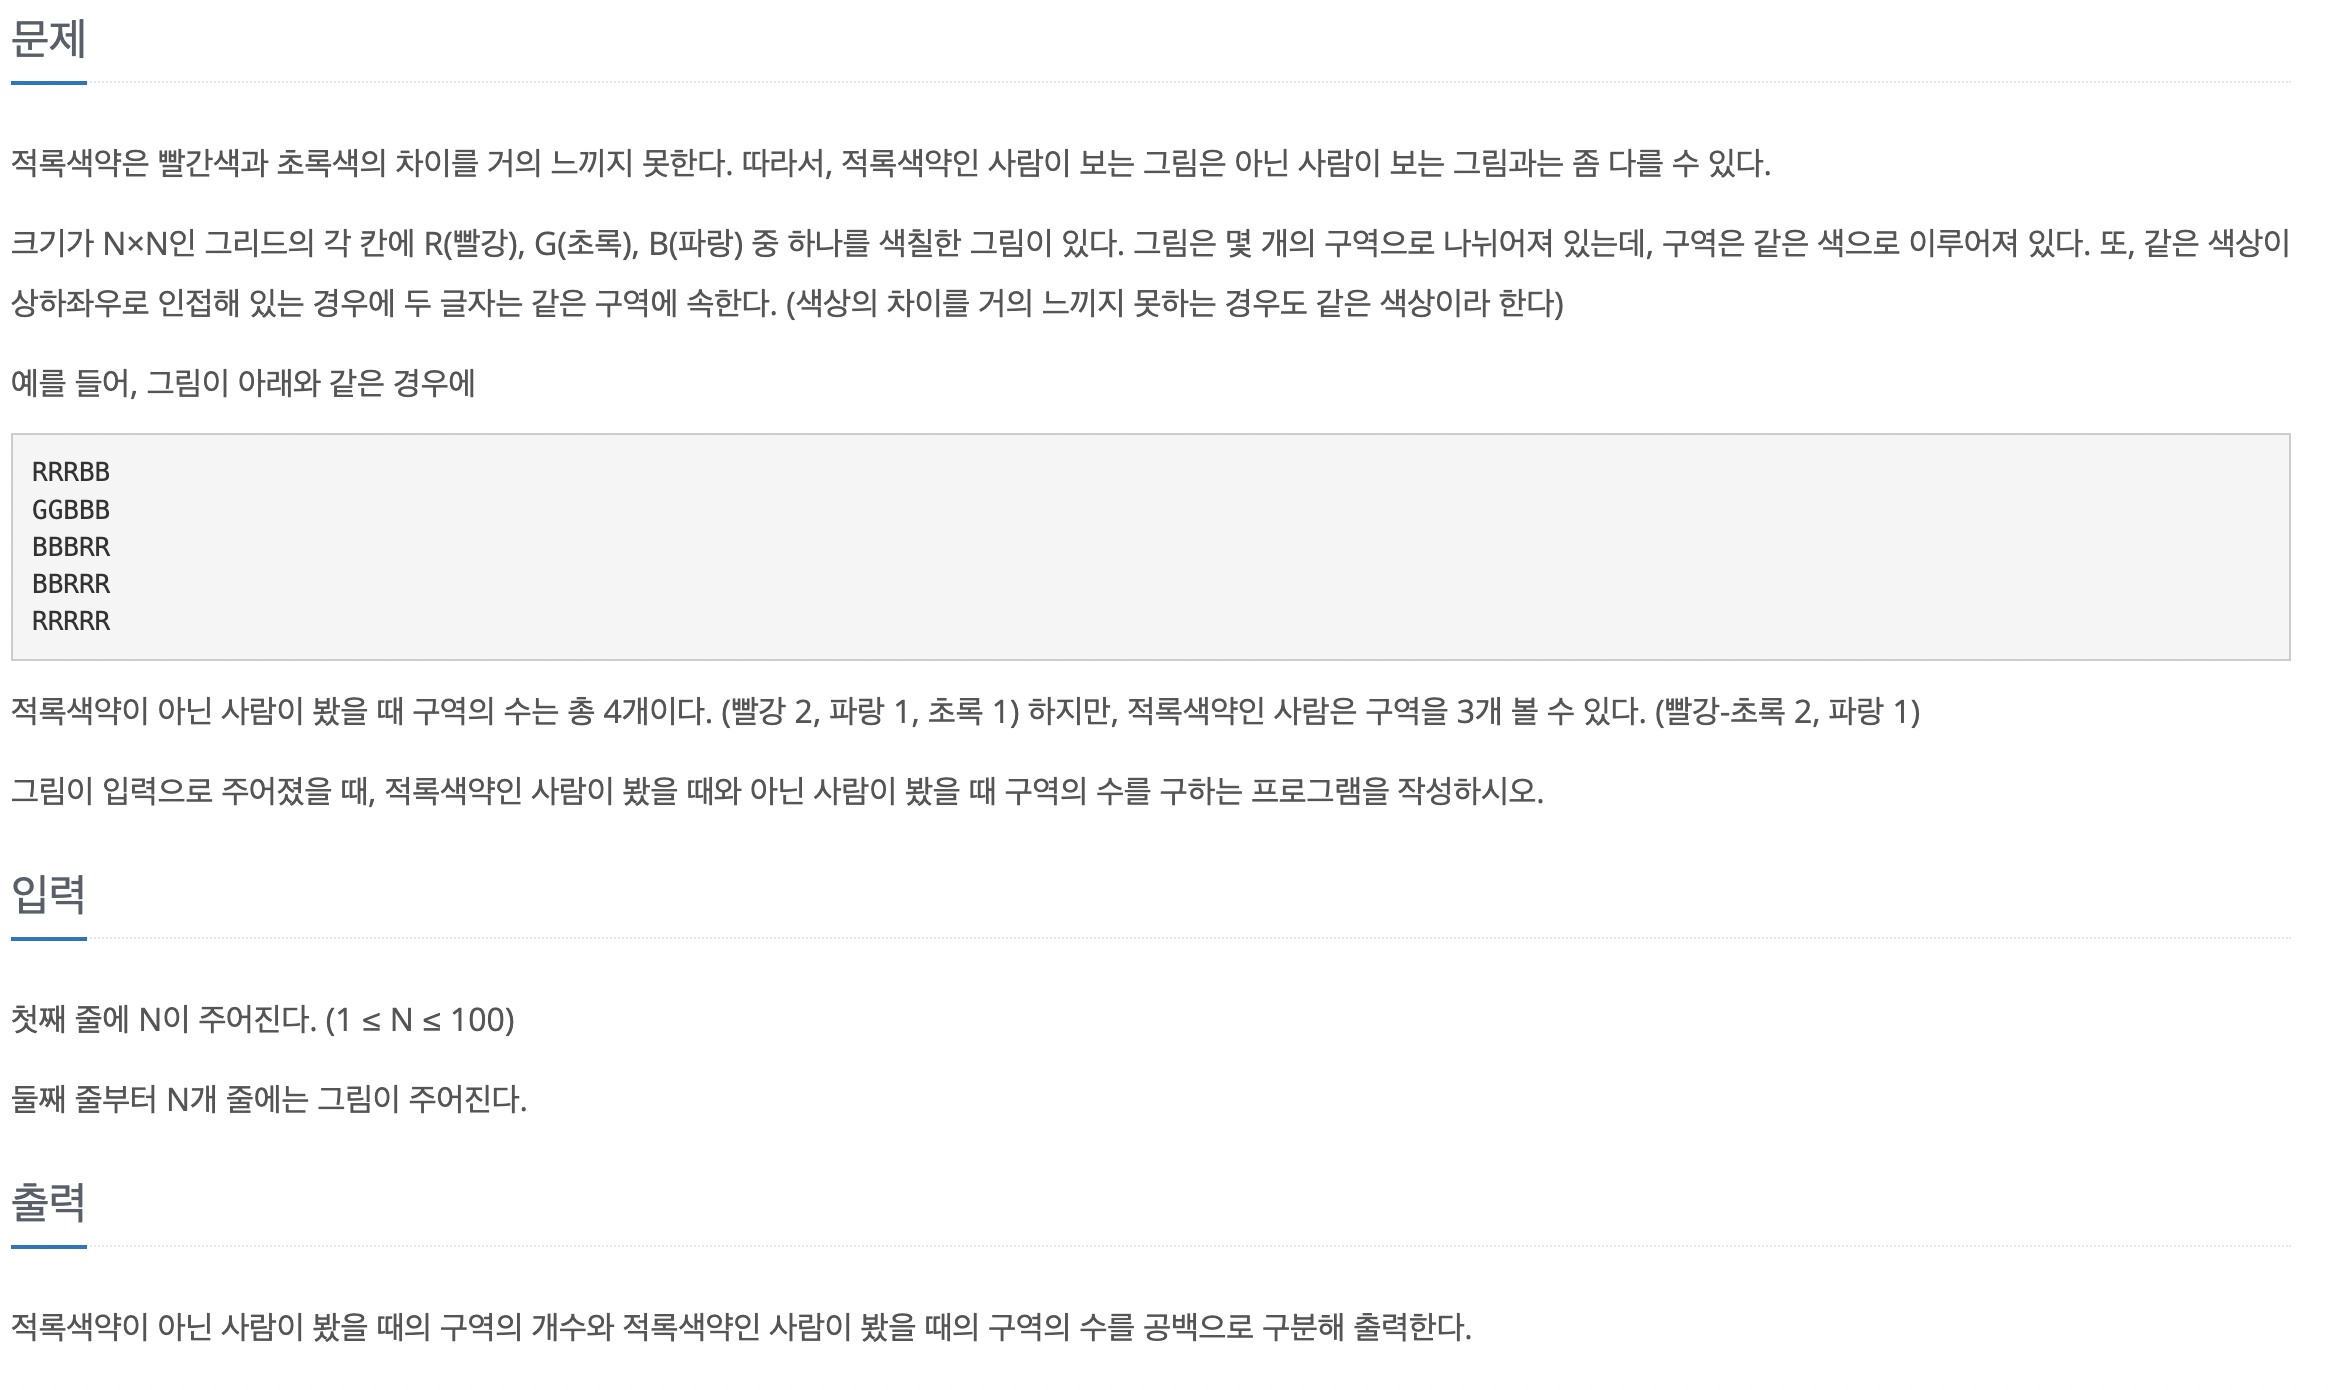
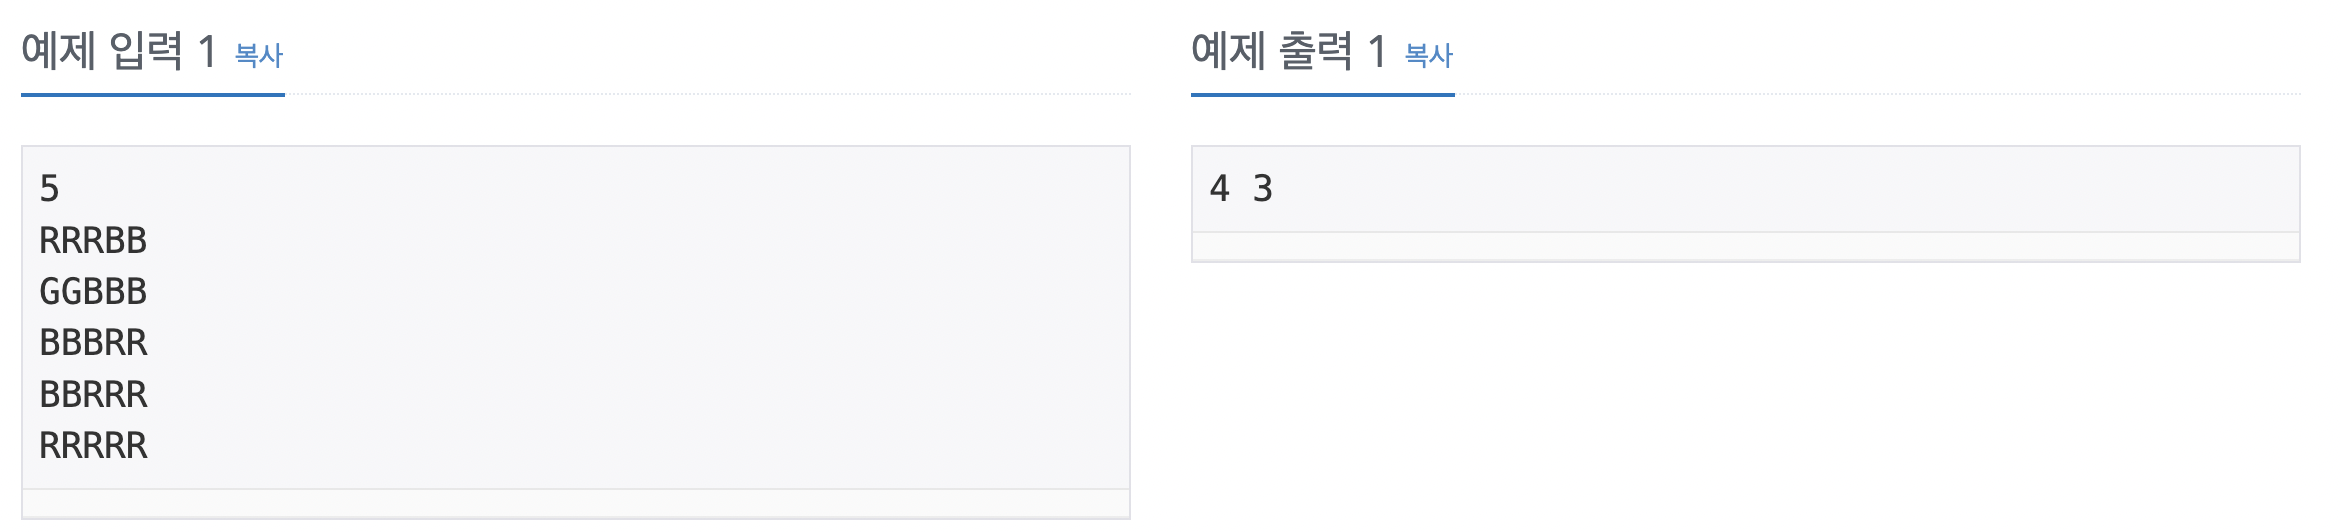

In [ ]:
import sys
input = sys.stdin.readline
sys.setrecursionlimit(10001)
n = int(input())
data = [list(input().rstrip()) for _ in range(n)]
temp_data = data
dx = [0,0,1,-1]
dy = [1,-1,0,0]

#색맹아님
def not_cb_dfs(x,y):
    not_cb_visited[x][y] = 1 # 방문처리하고
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0<= nx < n and 0<= ny < n:
            if data[nx][ny] == data[x][y] and not_cb_visited[nx][ny] == 0:
                not_cb_dfs(nx,ny)

#색맹임
def cb_dfs(x,y):
    cb_visited[x][y] = 1 # 방문처리하고
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0<= nx < n and 0<= ny < n:
            if temp_data[nx][ny] == temp_data[x][y] and cb_visited[nx][ny] == 0:
                cb_dfs(nx,ny)

###############
#색맹아닌사람
not_cb_visited = [[0]*n for _ in range(n)]
not_cb_cnt = 0

for i in range(n):
    for j in range(n):
        if not_cb_visited[i][j]==0:
            not_cb_dfs(i,j)
            not_cb_cnt += 1
################################################################
#색맹인사람
#G가나오면 R로 다 바꿔서 색맹이 아닌사람DFS함수랑 비슷하게 풀어주면된다.
for i in range(n):
    for j in range(n):
        if temp_data[i][j]=='G':
            temp_data[i][j] = 'R'

cb_visited =[[0]*n for _ in range(n)]
cb_cnt = 0
for i in range(n):
    for j in range(n):
        if cb_visited[i][j]==0:
            cb_dfs(i,j)
            cb_cnt += 1

print(not_cb_cnt,cb_cnt)

# 문제 3
- 벽 부수고 이동하기
- https://www.acmicpc.net/problem/2206

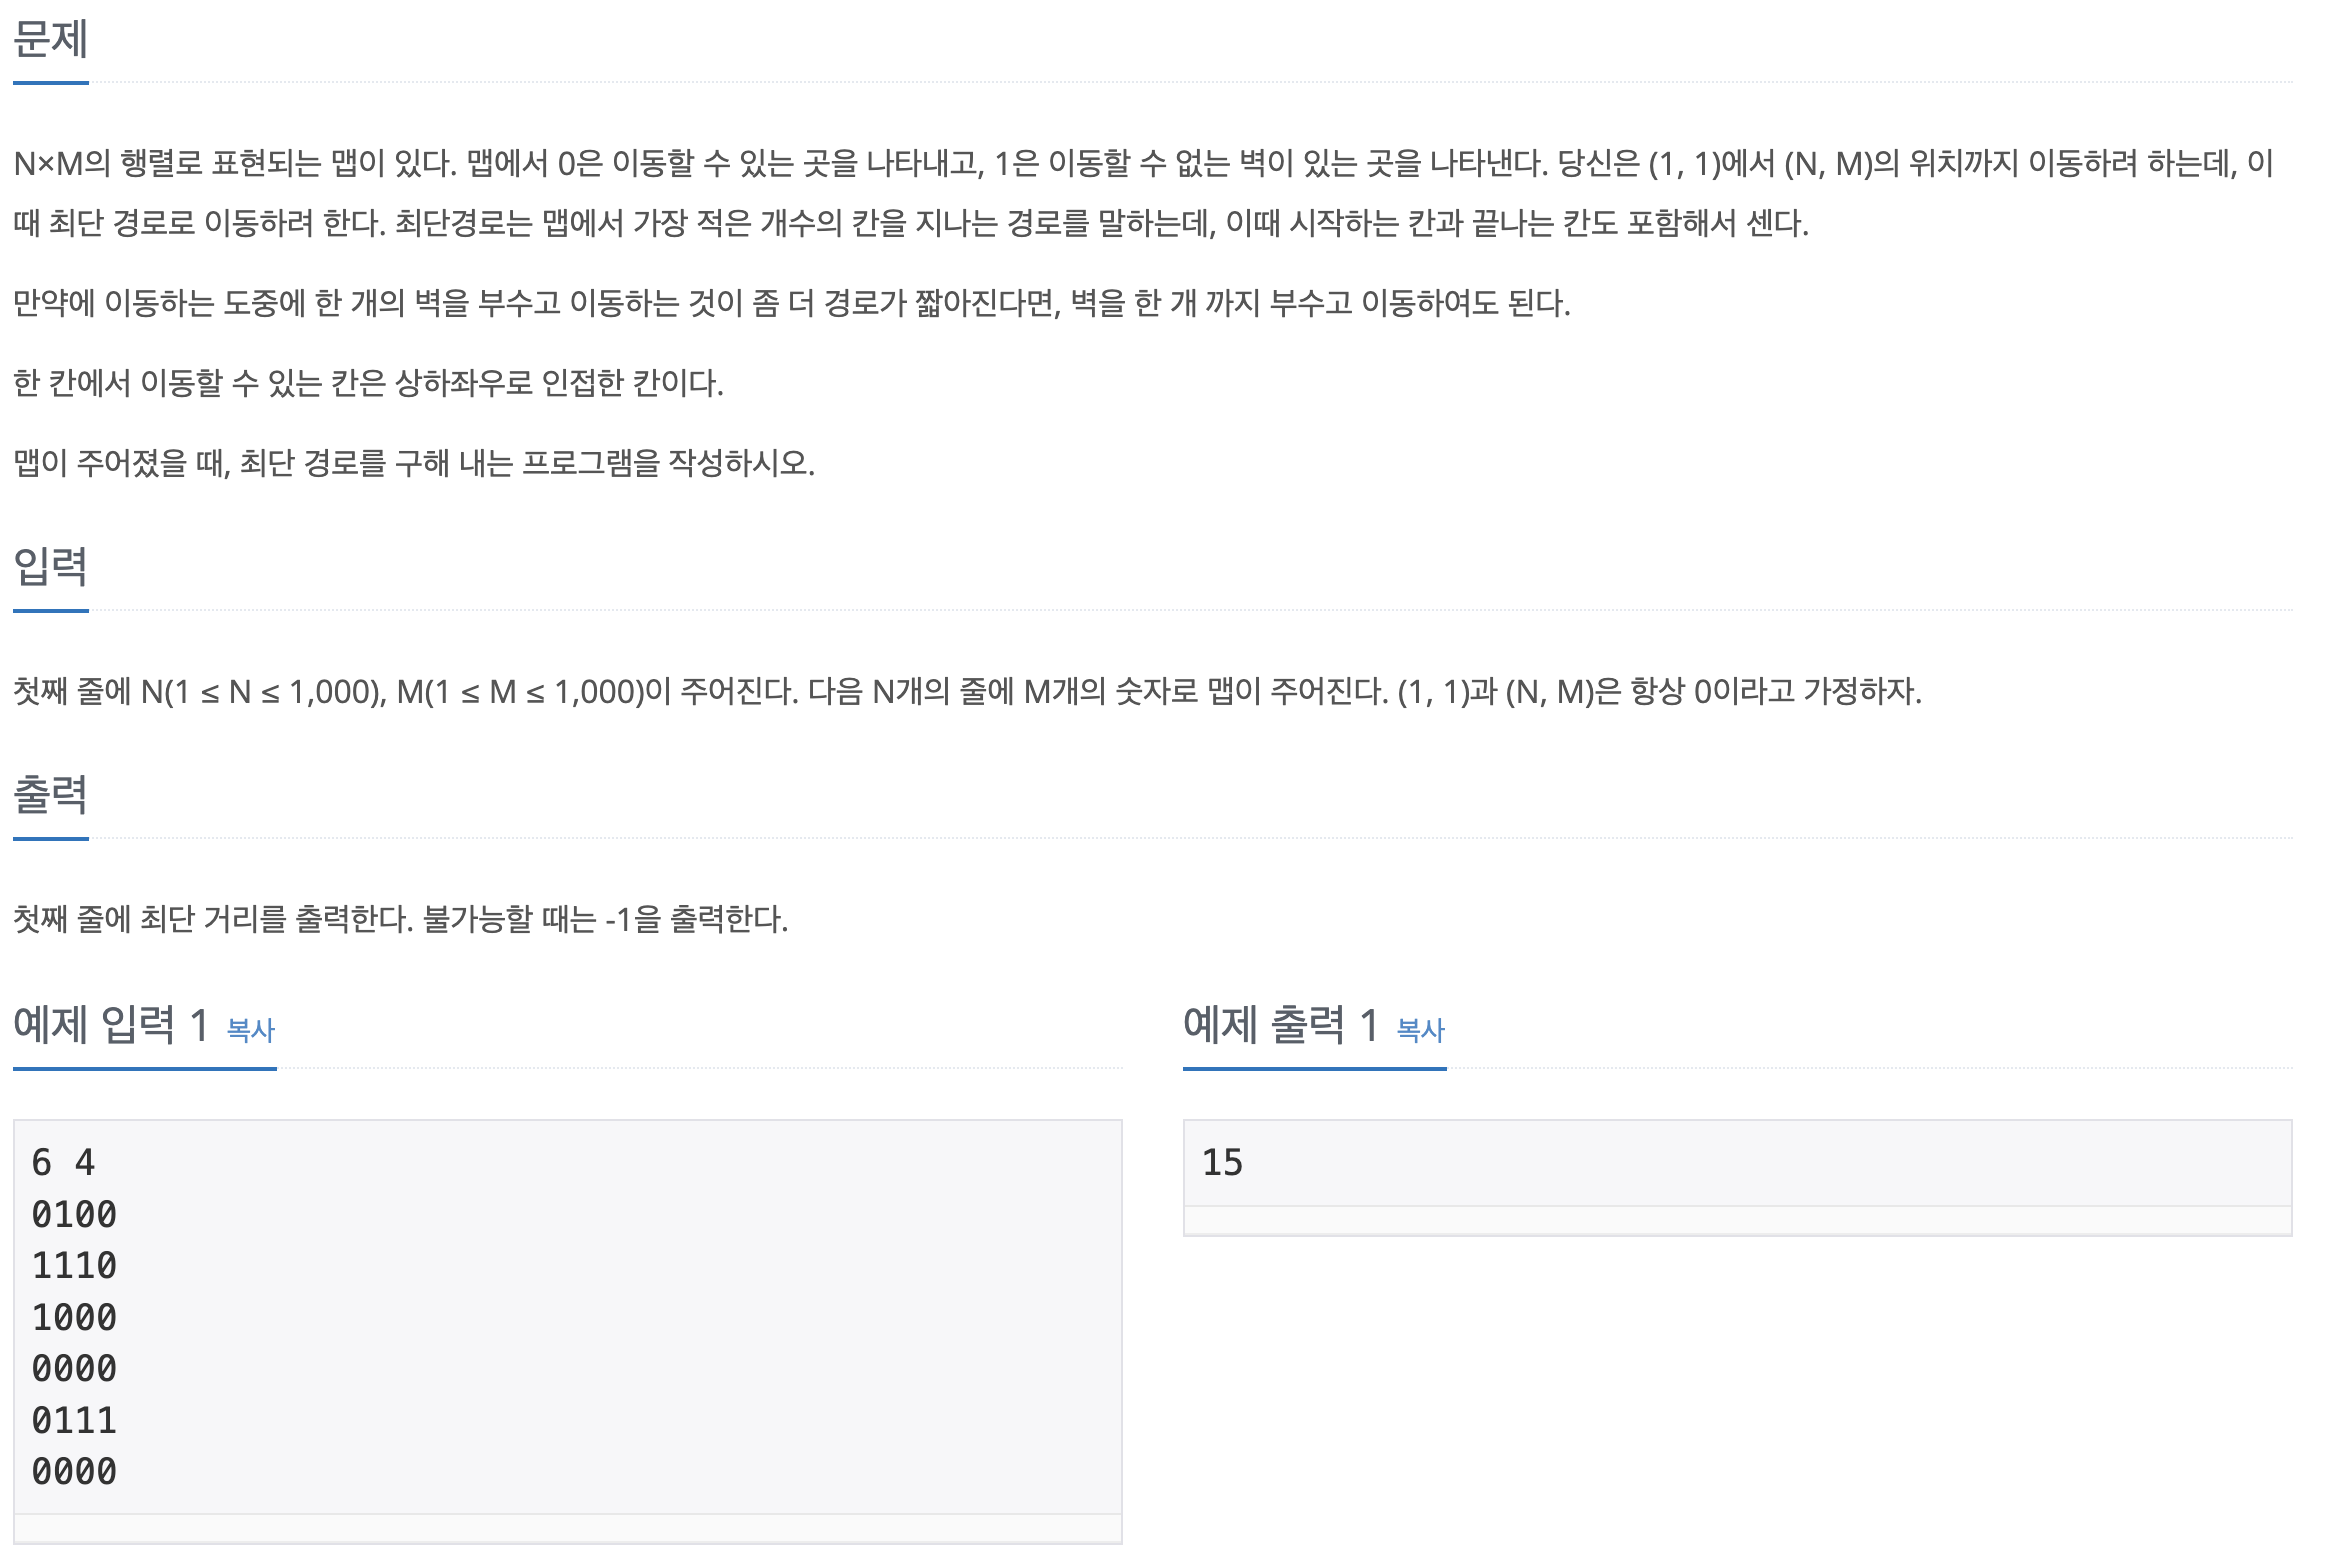

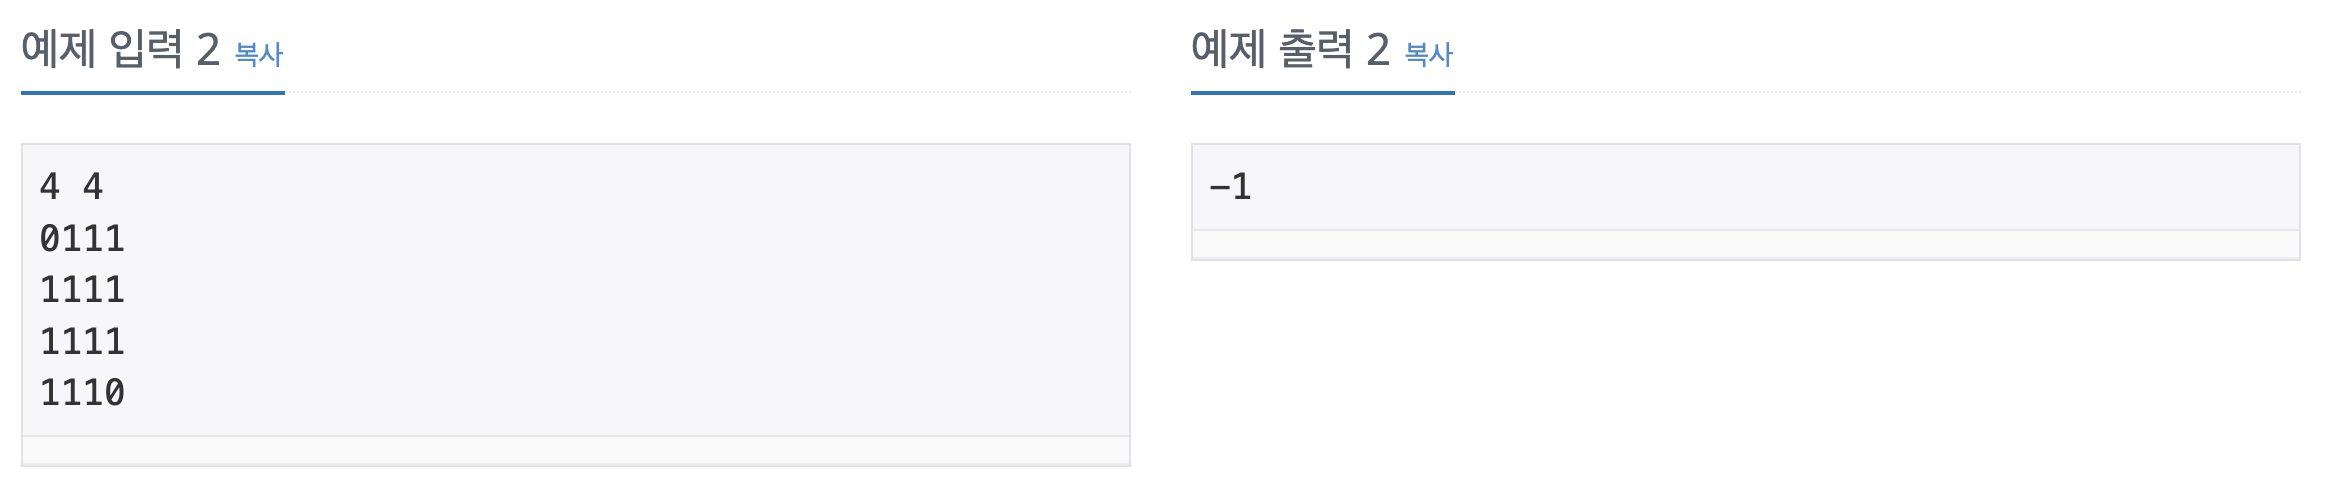

## Step
- 벽의 좌표 중 하나 무작위 선택하여 부순채로 진행?
    - 시간 초과 안걸리려나..
    - 시간 초과 발생
    

In [1]:
import sys
from collections import deque

#input = sys.stdin.readline

n,m = map(int,input().split())
board = [[] for _ in range(n)]
for i in range(n):
    tmp = str(input())
    for each in tmp:
        board[i].append(int(each))
        
wall = []
for x in range(n):
    for y in range(m):
        if board[x][y] == 1:
            wall.append((x,y))

dx = [-1,0,1,0]
dy = [0,1,0,-1]

def bfs(copy_board):
    q = deque()
    q.append((0,0))
    copy_board[0][0] = 1
    while q:
        x,y = q.popleft()

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0<=nx<n and 0<=ny<m:
                if copy_board[nx][ny] == 0:
                    copy_board[nx][ny] = copy_board[x][y] + 1
                    q.append((nx,ny))
    
    if copy_board[n-1][m-1] == 0:
        return -1
    else:
        return copy_board[n-1][m-1]
            
sys_max = sys.maxsize
ans = sys_max
for each in wall:
    copy_board = [board[i][:] for i in range(n)]
    cx,cy = each
    copy_board[cx][cy] = 0
    result = bfs(copy_board)
    
    if result != -1:
        ans = min(result, ans)
        
if ans == sys_max:
    ans = -1
    
print(ans)

8 8
01000100
01010100
01010100
01010100
01010100
01010100
01010100
00010100
29


## 벽을 부쉈는지 기억하며 이동

- 참고 코드
- https://seongonion.tistory.com/m/107

In [ ]:
import sys
from collections import deque

input = sys.stdin.readline
n, m = map(int, input().split())
graph = []
for _ in range(n):
    row = list(str(input().rstrip()))
    graph.append(list(map(int, row)))

# 3차원 배열 사용 -> visited[x][y][z], z = 0 or 1로 기록
# z = 0이면 벽을 뚫지 않고 간 경우, z = 1이면 벽을 뚫고 간 경우
moves = [
    [1, 0],
    [-1, 0],
    [0, 1],
    [0, -1]
]
visited = [[[0] * 2 for _ in range(m)] for _ in range(n)]

def bfs():
    q = deque()
    q.append([0, 0, 0])
    visited[0][0][0] = 1

    while q:
        x, y, w = q.popleft()
        
        # 목표지점 도달 시 해당 위치까지의 거리 리턴
        if x == n - 1 and y == m - 1:
            return visited[x][y][w]

        for move in moves:
            nx, ny = x + move[0], y + move[1]

            if 0 <= nx < n and 0 <= ny < m:
                # 현재 위치로 이동할 수 있고, 아직 방문하지 않았다면
                if graph[nx][ny] == 0 and visited[nx][ny][w] == 0:
                    visited[nx][ny][w] = visited[x][y][w] + 1
                    q.append([nx, ny, w])
                
                # 현재 위치가 벽이고, 벽을 아직 부수지 않았다면
                elif graph[nx][ny] == 1 and w == 0:
                    visited[nx][ny][w + 1] = visited[x][y][w] + 1
                    q.append([nx, ny, w + 1])
    
    # 목표지점까지 도달하지 못한다면 -1 리턴
    return -1

print(bfs())